Here are the data for 2.31 and 2.32 inputted as numpy arrays: each list is presented as its own array (rather than arrays with multiple lists in them).

Note: this could also be accomplished by data entry into a Google Sheet, followed by exporting as a .csv file and then importing using standard Python importing commands (which we might use in other locations).  This method of manual entry just ends up being the easiest thing to do here because we are working with textual data that came from a table in a book.

As is typical, we need to start with packages that we will use here: numpy for managing the data and matplotlib for making plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now here are the data: there are four columns so I will make four separately named arrays.

In [2]:
Pressures = np.array([0.500,2.00,10.00,20.00,40.00,60.00,80.00,100.0,120.0,160.0,200.0,240.0,300.0,350.0,400.0,450.0,500.0,600.0,700.0])
Vmolarethane = np.array([83.076,20.723,4.105,2.028,0.9907,0.6461,0.4750,0.3734,0.3068,0.2265,0.1819,0.1548,0.1303, 0.1175,0.1085,0.1019,0.09676,0.08937,0.08421]) #these V are at T=500K
Vmolarargon = np.array([40.506,10.106,1.999,0.9857,0.4795,0.3114,0.2279,0.1785,0.1462,0.1076,0.08630,0.07348,0.06208,0.05626,0.05219,0.04919,0.04687,0.04348,0.04108]) #these V are at T=247K

Now let's check that we didn't lose any points by checking the length of each list/array

In [3]:
np.size(Pressures)
np.size(Vmolarethane)
np.size(Vmolarargon)

19

So that worked out.  Now just for kicks and to recall how the syntax works, let's make a plot of P vs Vmolar for each of these gases. (This means that Vmolar will be the first input for each plot series because it's on the x axis.) Since this is data (and to remind me that it is) I am making a scatter plot rather than a line plot (which is what "plot" generates by default).

Text(0.5, 0, 'molar volume (L)')

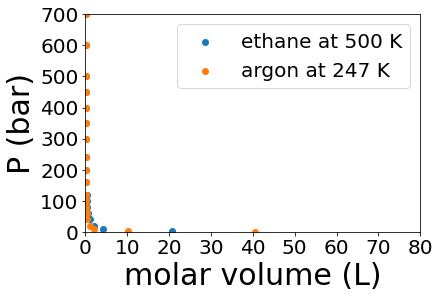

In [4]:
plt.scatter(Vmolarethane, Pressures, label='ethane at 500 K')
plt.scatter(Vmolarargon, Pressures, label='argon at 247 K')

plt.legend(fontsize=20)
plt.ylim(0, 700)
plt.xlim(0,80)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('P (bar)', fontsize=30)
plt.xlabel('molar volume (L)', fontsize=30)

Ok so that works; we could go on tweaking limits of axes, etc. to make things look nicer but the plots are working and the data are intact.

Now we need to manipulate the existing data to make a plot of either Z vs the reduced molar volume (V/Vc) or Z vs the reduced pressure (P/Pc).  So we need to make new arrays from the existing ones by doing relatively simple math manipulations to yield Z, Vreduced, and Preduced for each gas.  For this to work we need to define Z and also look up the Vc and Pc for each gas.

In [5]:
#define necessary constants first
R = 8.314e-2 #L bar /mol K
Vc_ethane = 0.1480 #L/mol
Pc_ethane = 48.714 #bar
Vc_argon = 0.07530 #L/mol
Pc_argon = 48.643 #bar

#now define Z, as before, for any P and Vbar and T
def Z(P,Vbar,T): #this is the definition of Z based on P and Vbar
  return P*Vbar/(R*T)

In [6]:
#now make arrays of P/Pc and V/Vc, and Z for each gas
Zethane = Z(Pressures,Vmolarethane,500)
Zargon = Z(Pressures,Vmolarargon,247)
Preduced_argon = Pressures/Pc_argon
Preduced_ethane = Pressures/Pc_ethane
Vreduced_argon = Vmolarargon/Vc_argon
Vreduced_ethane = Vmolarethane/Vc_ethane

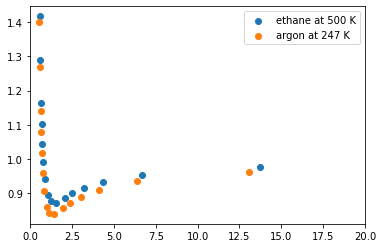

In [7]:
plt.scatter(Vreduced_ethane,Zethane,label='ethane at 500 K')
plt.scatter(Vreduced_argon,Zargon,label='argon at 247 K')
# plt.figure(figsize=(16,9))
plt.xlim(0,20)
plt.legend()

So why does this show a "law of corresponding states"?  That's something that you will need to discuss amongst yourselves and figure out for your own notes.  The plot here is an essential part of the solution to problem 2-31.  Now do 2-32, and then try 2-33 and/or 2-34 where you compare data to an empirical function.

Note that we are not doing any fitting or anything here at this point, but that is also something that could be assessed with all of these arrays working successfully.

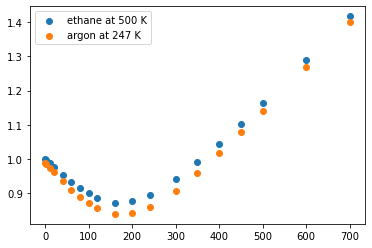

In [8]:
plt.scatter(Pressures,Zethane,label='ethane at 500 K')
plt.scatter(Pressures,Zargon,label='argon at 247 K')
# plt.figure(figsize=(16,9))
# plt.xlim(0,20)
plt.legend()

In [9]:
a_argon = 1.3483
a_ethane = 5.5818
b_argon = 0.031830
b_ethane = 0.065144

def P_vdw_ethane(Vbar,T): # Van der Waal equations for Pressure and Z
    return ((R*T)/(Vbar-b_ethane))-(a_ethane/(Vbar**2))

def P_vdw_argon(Vbar,T): # Van der Waal equations for Pressure and Z
    return ((R*T)/(Vbar-b_argon))-(a_argon/(Vbar**2))

def Z_vdw_bad(P,Vbar,T):
    return (P*(Vbar))/(R*T)

def Z_vdw_2(Vbar,T):
    return (Vbar/(Vbar-b)-a/(R*T*Vbar))

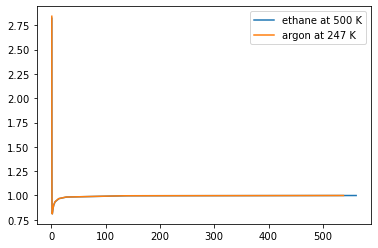

In [10]:
plt.plot(Vreduced_ethane,Z_vdw_bad(P_vdw_ethane(Vmolarethane,500),Vmolarethane,500),label='ethane at 500 K')
plt.plot(Vreduced_argon,Z_vdw_bad(P_vdw_argon(Vmolarargon,247),Vmolarargon,247),label='argon at 247 K')
# plt.figure(figsize=(16,9))
# plt.xlim(0,20)
plt.legend()

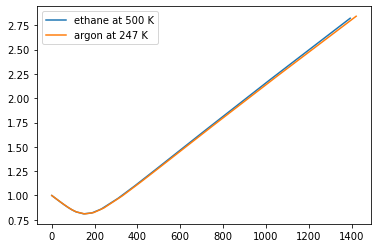

In [11]:
plt.plot(P_vdw_ethane(Vmolarethane,500),Z_vdw_bad(P_vdw_ethane(Vmolarethane,500),Vmolarethane,500),label='ethane at 500 K')
plt.plot(P_vdw_argon(Vmolarargon,247),Z_vdw_bad(P_vdw_argon(Vmolarargon,247),Vmolarargon,247),label='argon at 247 K')
# plt.figure(figsize=(16,9))
# plt.xlim(0,20)
plt.legend()